# **Week 4 Notes**

In [2]:
#Import All Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#**Cross** **Validation**

In [ ]:
#Iris Dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
#import all methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.3)

**cross_val_score** **function**

In [6]:
from sklearn.model_selection import cross_val_score

 **Logistic Regression**

In [7]:
score1 = cross_val_score(LogisticRegression(solver='liblinear'), iris.data, iris.target,cv=5)
print(score1)
np.average(score1)

[1.         0.96666667 0.93333333 0.9        1.        ]


np.float64(0.9600000000000002)

**SVM**

In [8]:
score2=cross_val_score(SVC(gamma='auto'), iris.data, iris.target,cv=5)
print(score2)
np.average(score2)

[0.96666667 1.         0.96666667 0.96666667 1.        ]


np.float64(0.9800000000000001)

**Decision** **Tree**

In [9]:
score3=cross_val_score(DecisionTreeClassifier(),iris.data,iris.target,cv=5)
print(score3)
np.average(score3)

[0.96666667 0.96666667 0.9        0.96666667 1.        ]


np.float64(0.9600000000000002)

**Random Forest**

In [10]:
score4=cross_val_score(RandomForestClassifier(n_estimators=30),iris.data, iris.target,cv=5)
print(score4)
np.average(score4)

[0.96666667 0.96666667 0.9        0.96666667 1.        ]


np.float64(0.9600000000000002)

#**HyperTuning**


1.   GridSearchCV
2.   RandomisedSearchCV



*Note: Here first we test model across all parameters and then find best one and then we will split the dataset*

In [11]:
#import both
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [12]:
#GridSearchCV
model1= SVC()

In [13]:
# hyperparameters

parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

In [14]:
# grid search
classifier = GridSearchCV(model1, parameters, cv=5)

In [15]:
# fitting the data to our model
classifier.fit(iris.data, iris.target)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [16]:
# loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001708,0.000682,0.000963,0.000277,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.000000,0.980000,0.016330,2
1,0.001120,0.000057,0.000823,0.000091,1,poly,"{'C': 1, 'kernel': 'poly'}",0.966667,1.000000,0.966667,0.966667,1.000000,0.980000,0.016330,2
2,0.001267,0.000111,0.000879,0.000074,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,0.966667,0.966667,0.933333,1.000000,0.966667,0.021082,8
3,0.002252,0.000090,0.001339,0.000219,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.033333,0.166667,0.000000,0.100000,0.033333,0.066667,0.059628,13
4,0.001048,0.000025,0.000762,0.000025,5,linear,"{'C': 5, 'kernel': 'linear'}",1.000000,1.000000,0.933333,0.966667,1.000000,0.980000,0.026667,2


In [17]:
print(classifier.best_params_) #best parameter
print(classifier.best_score_) #accuracy

{'C': 5, 'kernel': 'rbf'}
0.9866666666666667


In [18]:
#RandomisedSearchCV
model2= SVC()
classifier = RandomizedSearchCV(model2, parameters, cv=5)

In [19]:
# fitting the data to our model
classifier.fit(iris.data, iris.target)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [20]:
# loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002933,0.000826,0.001459,0.000309,sigmoid,20,"{'kernel': 'sigmoid', 'C': 20}",0.033333,0.133333,0.000000,0.033333,0.000000,0.040000,0.048990,10
1,0.001084,0.000065,0.000747,0.000037,linear,10,"{'kernel': 'linear', 'C': 10}",1.000000,1.000000,0.900000,0.966667,1.000000,0.973333,0.038873,3
2,0.002148,0.000092,0.001010,0.000061,sigmoid,5,"{'kernel': 'sigmoid', 'C': 5}",0.033333,0.166667,0.000000,0.100000,0.033333,0.066667,0.059628,7
3,0.001439,0.000272,0.000935,0.000101,rbf,1,"{'kernel': 'rbf', 'C': 1}",0.966667,0.966667,0.966667,0.933333,1.000000,0.966667,0.021082,4
4,0.001256,0.000146,0.000908,0.000236,poly,10,"{'kernel': 'poly', 'C': 10}",1.000000,1.000000,0.900000,0.933333,1.000000,0.966667,0.042164,4


In [21]:
print(classifier.best_params_) #best parameter
print(classifier.best_score_) #accuracy

{'kernel': 'linear', 'C': 1}
0.9800000000000001


**Accuracy**

GridSearchCV : *0.9866666666666667*

RandomisedSearchCV : *0.9800000000000001*

# **Random Forest**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.3)

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

#model score
model.score(X_test, y_test)

0.9777777777777777

# **Gradient Boost**

In [24]:
#import
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

X, y = iris.data, iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Initialize and train the model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [26]:
#Use GradientSearchCV

parameters = {
              'n_estimators':[50,100,150],
              'learning_rate':[0.001,0.1,0.5],
              'max_depth':[2,3,4]
}

In [27]:
classifier = GridSearchCV(model,parameters,cv=5)
classifier.fit(iris.data, iris.target)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.001, 0.1, 0.5],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 150]})

In [28]:
print(classifier.best_params_) #best parameter
print(classifier.best_score_) #accuracy

{'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100}
0.9666666666666668


# **AdaBoost**

In [29]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

In [30]:
clf = AdaBoostClassifier(n_estimators=60, learning_rate=0.05, random_state=2021)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train Adaboost Classifer
model4 = clf.fit(X_train, y_train)

In [31]:
#Predict the response for test dataset
y_pred = model4.predict(X_test)

# calculate and print model accuracy
accuracy_score(y_test, y_pred)

0.9833333333333333

# **XGBoost**

Note: *XGBoost uses “sparsity-aware” algorithm to automatically assign missing values to the optimal branch, so you don't need manual imputation.It is efficient for larger data.*

In [55]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=500) #can also provide learning_rate
my_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.021207915619015694


# **KNN**

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs #it is used to create dataset with desired features and classes (syntethic dataset)

In [34]:
X1,y1= make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.5,random_state=4)

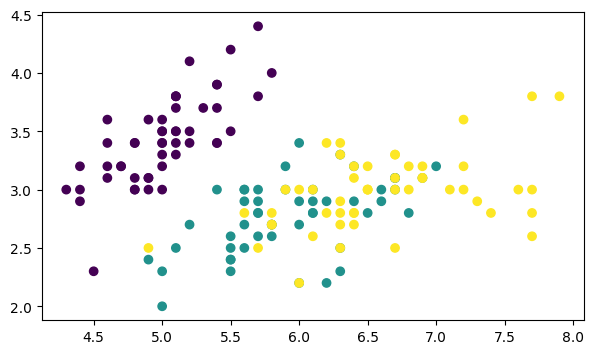

In [35]:
plt.figure(figsize=(7,4))
plt.scatter(X[:,0],X[:,1],c=y,marker='o')
plt.show()

In [36]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=0)

#k=5(default)
knn=KNeighborsClassifier()
knn.fit(X1_train,y1_train)
#k=1
knn1=KNeighborsClassifier(n_neighbors=1)
knn1.fit(X1_train,y1_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
y_pred1=knn.predict(X1_test)
y_pred2=knn1.predict(X1_test)

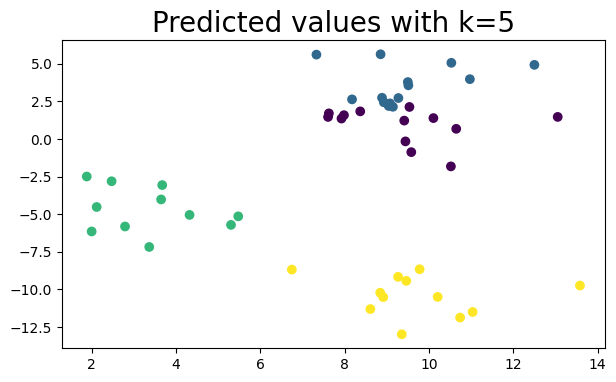

In [38]:
plt.figure(figsize = (7,4))
plt.scatter(X1_test[:,0], X1_test[:,1], c=y_pred1, marker= 'o')
plt.title("Predicted values with k=5", fontsize=20)
plt.show()

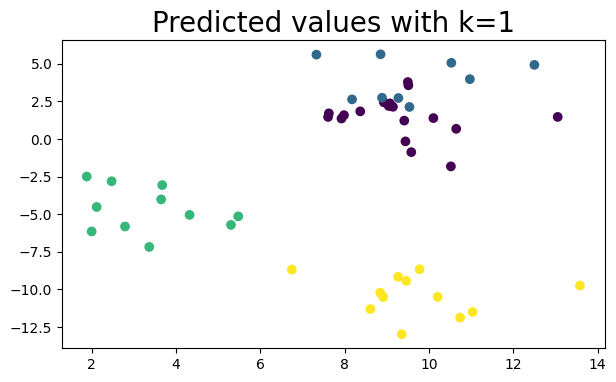

In [39]:
plt.figure(figsize = (7,4))
plt.scatter(X1_test[:,0], X1_test[:,1], c=y_pred2, marker= 'o')
plt.title("Predicted values with k=1", fontsize=20)
plt.show()

**Week 4 Completed !!**